In [ ]:
Name: Aachal A Jangam 
task 1 name : House Price Prediction using machine learning
Bharat Intern internship 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

# Load the data

In [2]:
house_predict=pd.read_csv("data.csv")

In [3]:
house_predict

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
house_predict.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
house_predict.shape

(4600, 18)

In [6]:
house_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
house_predict.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


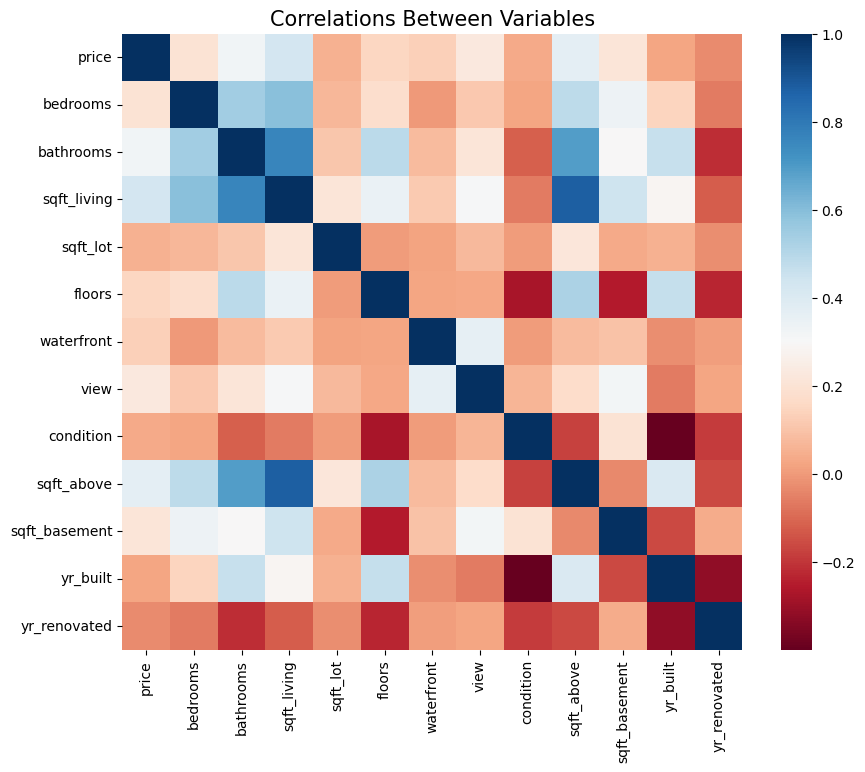

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(house_predict.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [9]:
important_num_cols = list(house_predict.corr()["price"][(house_predict.corr()["price"]>0.50) | (house_predict.corr()["price"]<-0.50)].index)
cat_cols = ["bedrooms", "sqft_lot","view","condition","bathrooms","waterfront","sqft_living"]
important_cols = important_num_cols + cat_cols

house_predict = house_predict[important_cols]

In [10]:
print("Missing Values by Column")
print("-"*30)
print(house_predict.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",house_predict.isna().sum().sum())

Missing Values by Column
------------------------------
price          0
bedrooms       0
sqft_lot       0
view           0
condition      0
bathrooms      0
waterfront     0
sqft_living    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


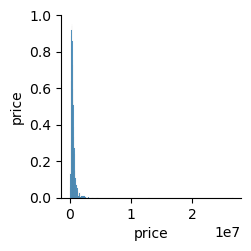

In [11]:
sns.pairplot(house_predict[important_num_cols])

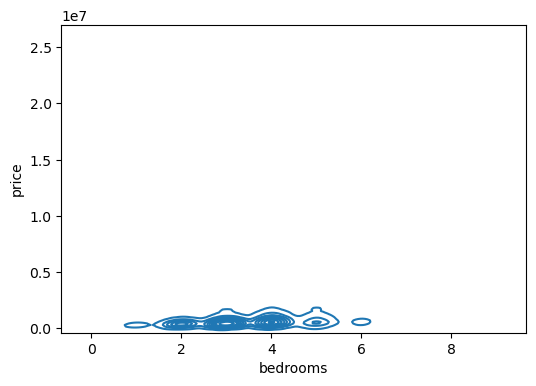

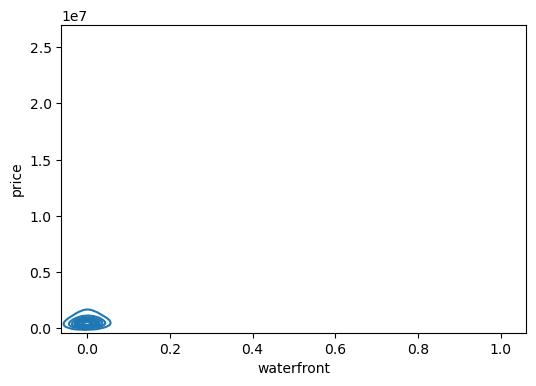

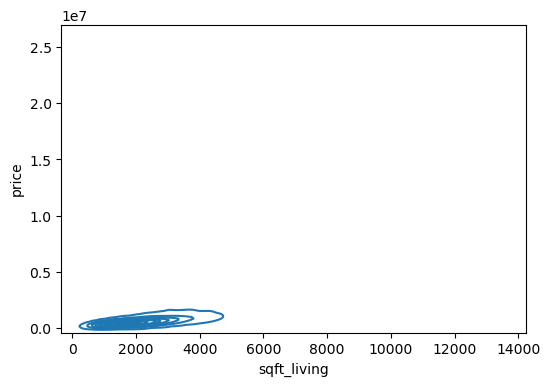

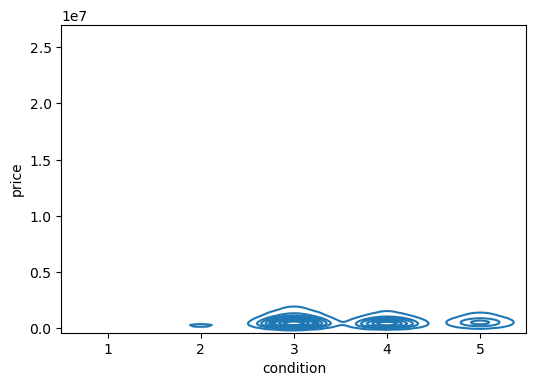

()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.kdeplot(data=house_predict, x="bedrooms", y="price")
plt.show()

plt.figure(figsize=(6, 4))
sns.kdeplot(data=house_predict, x="waterfront", y="price")
plt.show()

plt.figure(figsize=(6, 4))
sns.kdeplot(data=house_predict, x="sqft_living", y="price")
plt.show()

plt.figure(figsize=(6, 4))
sns.kdeplot(data=house_predict, x="condition", y="price")
plt.show()
()

In [13]:
print(house_predict.columns)

Index(['price', 'bedrooms', 'sqft_lot', 'view', 'condition', 'bathrooms',
       'waterfront', 'sqft_living'],
      dtype='object')


In [14]:
np.where(house_predict.isna()==True)

(array([], dtype=int64), array([], dtype=int64))

In [15]:
house_predict["price"].unique()

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [16]:
print(house_predict.columns)


Index(['price', 'bedrooms', 'sqft_lot', 'view', 'condition', 'bathrooms',
       'waterfront', 'sqft_living'],
      dtype='object')


In [17]:
price_counts=house_predict['price'].value_counts()

In [18]:
price_counts

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [19]:
bedrooms_counts=house_predict["bedrooms"].value_counts()

In [20]:
bedrooms_counts

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [21]:
house_predict_x = house_predict.drop("price", axis=1)
y = house_predict["price"].values

In [22]:
house_predict_x

,bedrooms,sqft_lot,view,condition,bathrooms,waterfront,sqft_living
0,3.0,7912,0,3,1.50,0,1340
1,5.0,9050,4,5,2.50,0,3650
2,3.0,11947,0,4,2.00,0,1930
3,3.0,8030,0,4,2.25,0,2000
4,4.0,10500,0,4,2.50,0,1940
...,...,...,...,...,...,...,...
4595,3.0,6360,0,4,1.75,0,1510
4596,3.0,7573,0,3,2.50,0,1460
4597,3.0,7014,0,3,2.50,0,3010
4598,4.0,6630,0,3,2.00,0,2090


In [23]:
house_predict_x_num = house_predict_x[["sqft_living"]]

In [24]:
house_predict_x_num.min(), house_predict_x_num.max(), y.min(), y.max()

(sqft_living    370
 dtype: int64,
 sqft_living    13540
 dtype: int64,
 0.0,
 26590000.0)

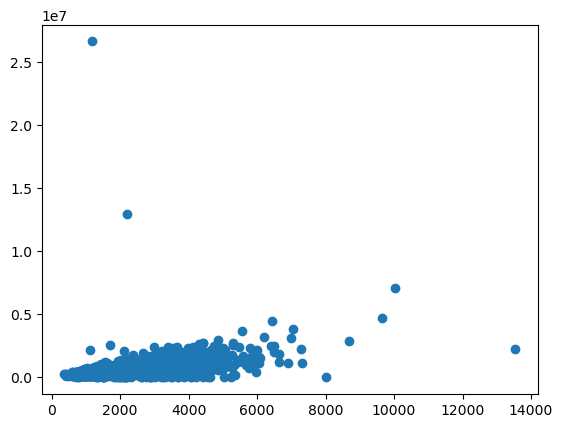

In [25]:
plt.scatter(house_predict_x["sqft_living"], y)
plt.show()

In [26]:
bedrooms = np.random.normal(size=1000)

In [27]:
bathrooms = np.random.normal(size=1000)

<AxesSubplot: >

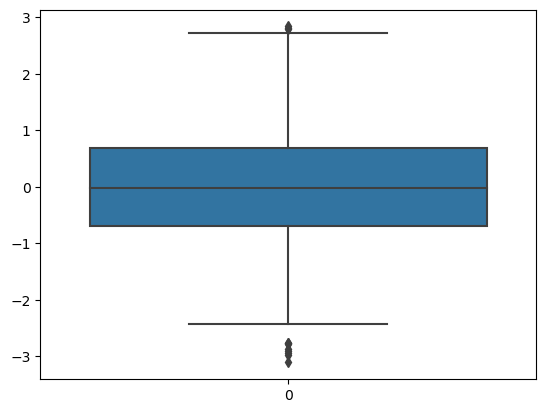

In [28]:
sns.boxplot(bedrooms)

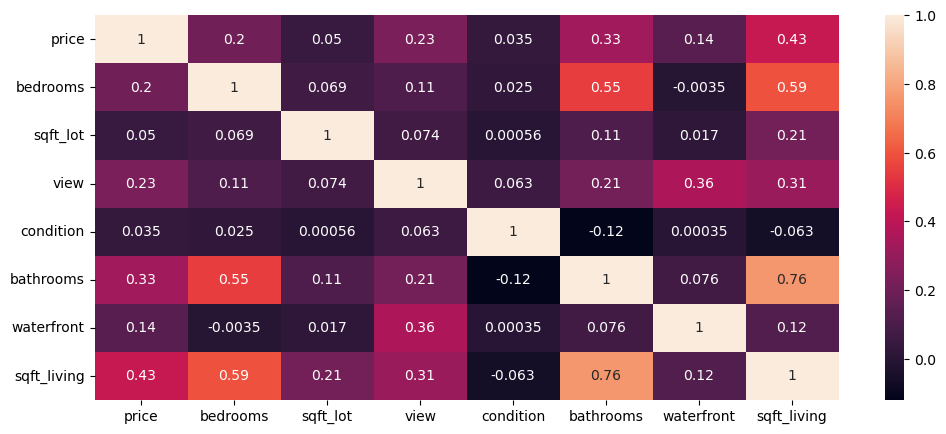

In [29]:
plt.figure(figsize=(12, 5))

correlation = house_predict.corr()

sns.heatmap(correlation, annot=True)
plt.show()

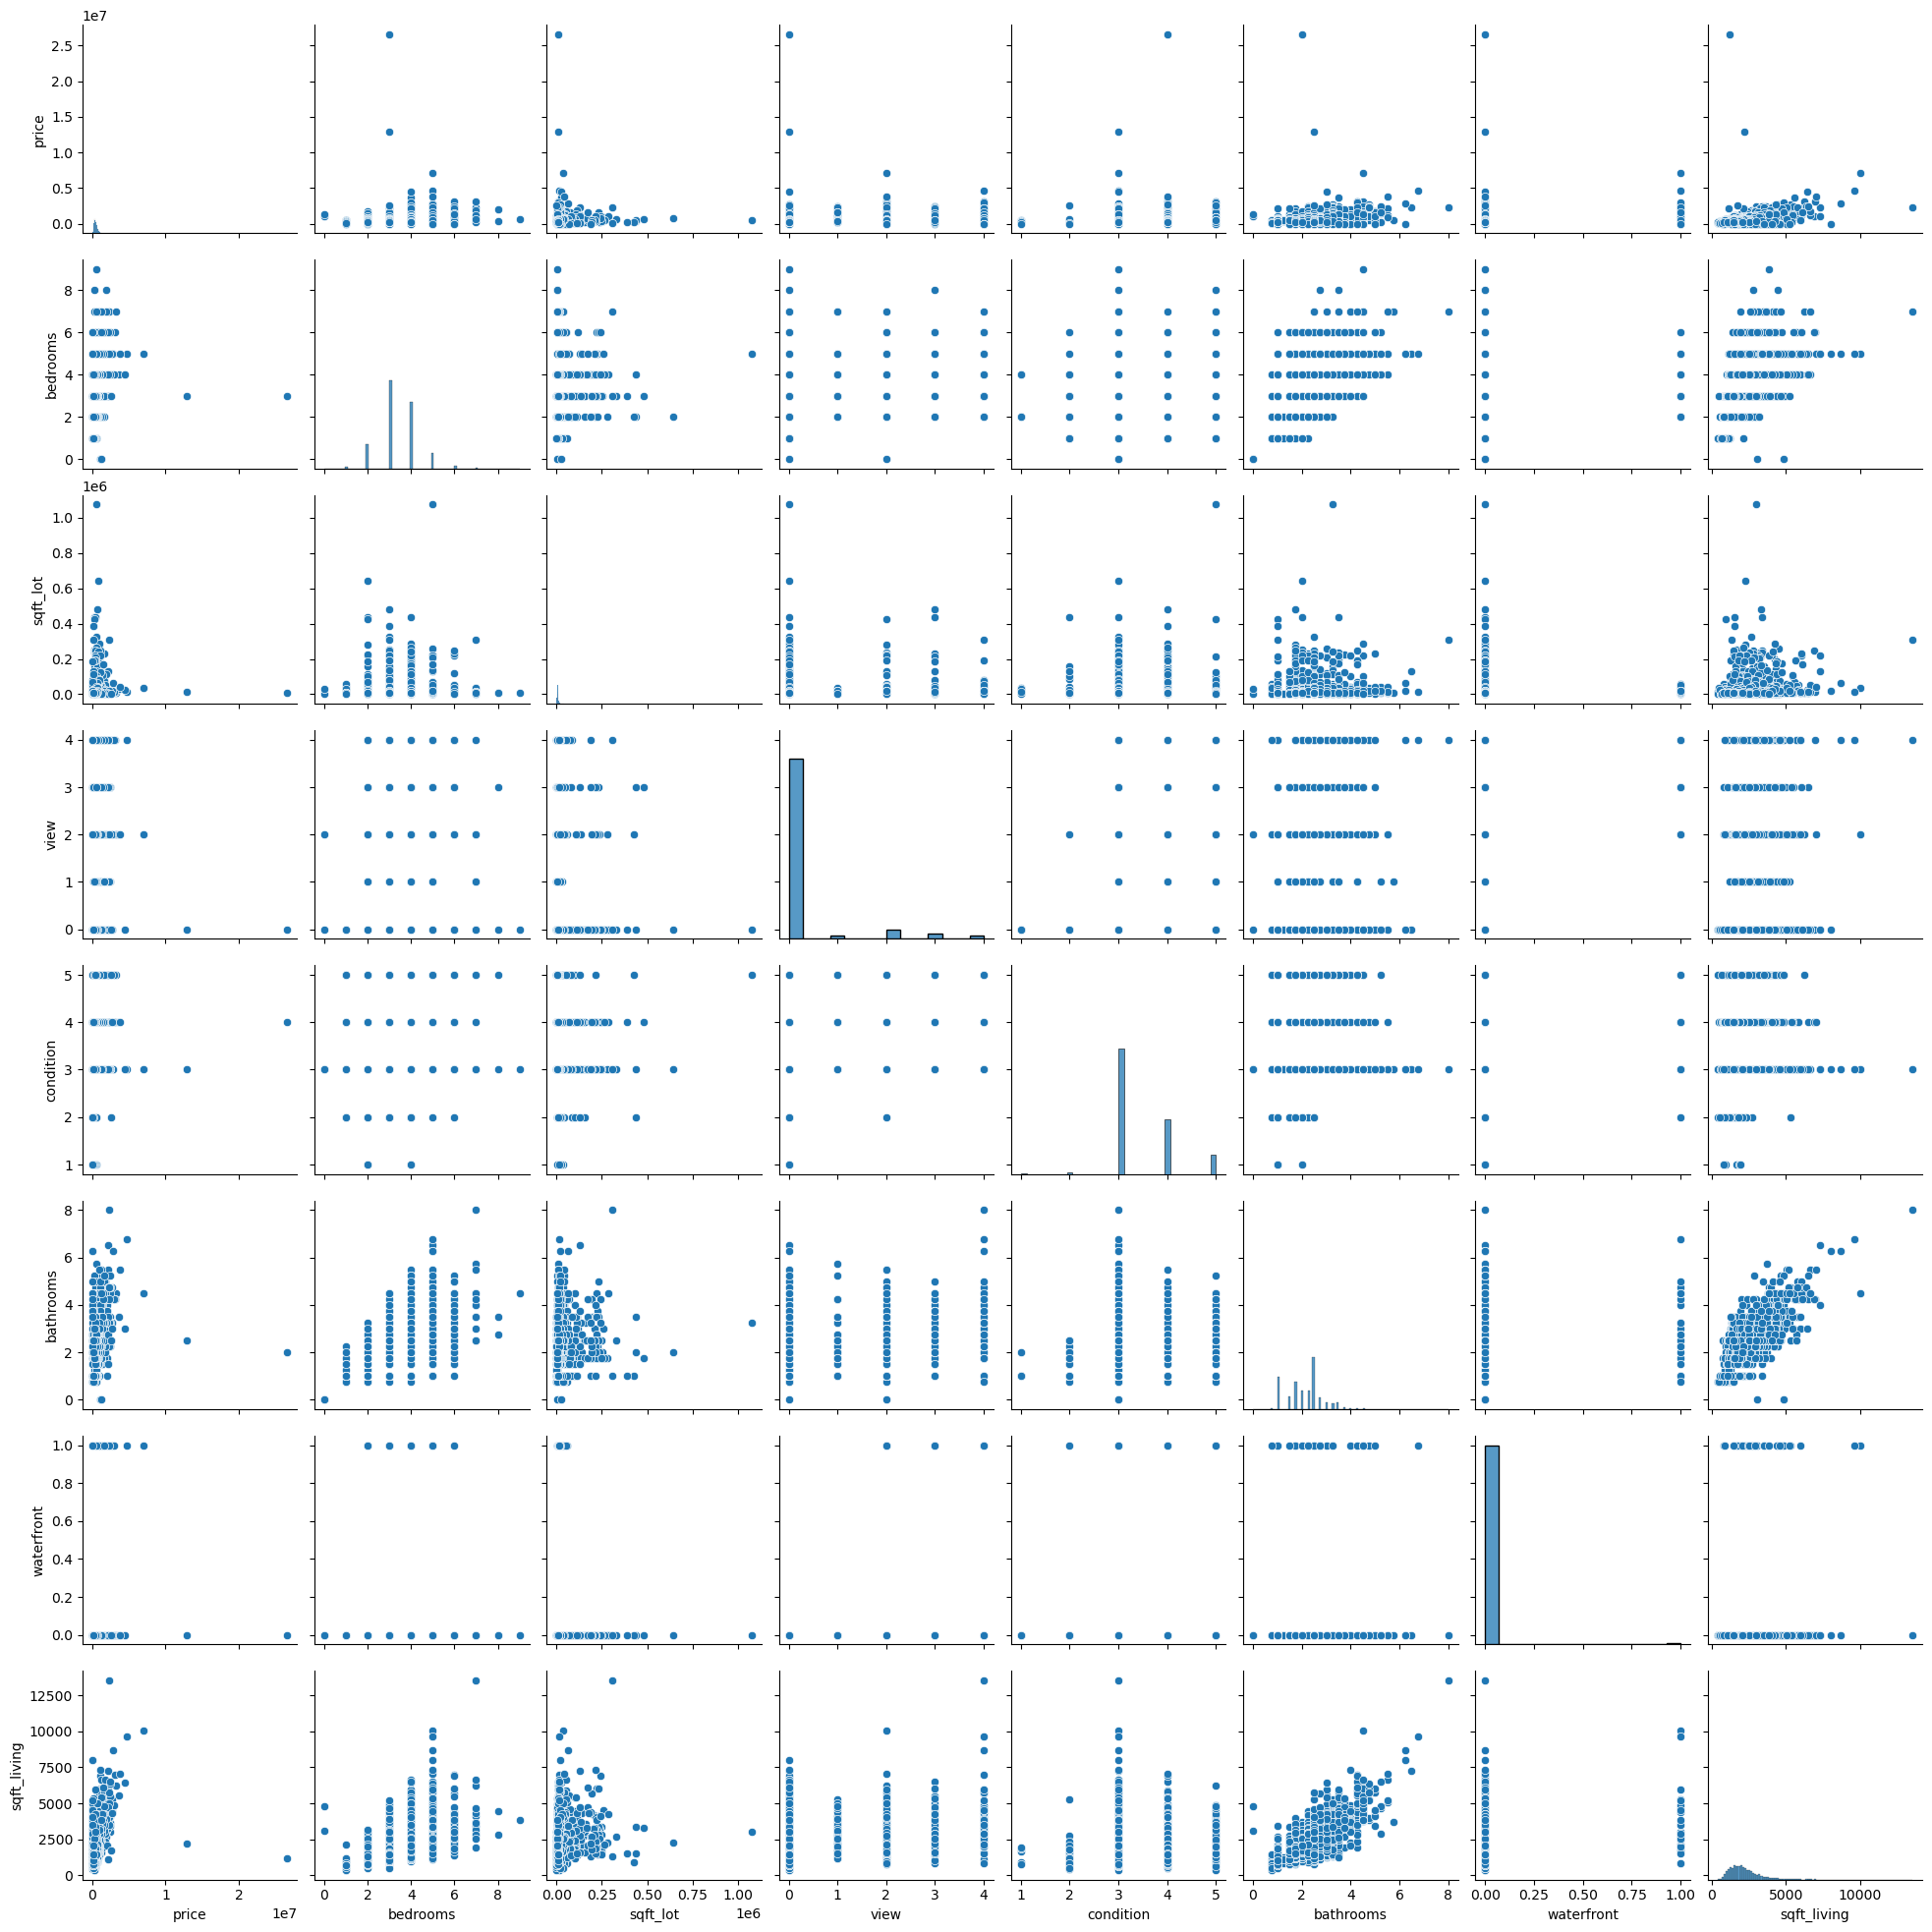

In [30]:
sns.pairplot(house_predict)

In [31]:
# create x and y
feature_cols = 'sqft_living'
x = house_predict[feature_cols] # predictor
y = house_predict.price # response

In [32]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)
# the test set will be 20% of the whole data set

In [33]:
from sklearn.linear_model import LinearRegression
# Reshape x_train to a 2D array
x_train_reshaped = x_train.values.reshape(-1, 1)
# Create an instance of LinearRegression
linreg = LinearRegression()

# Fit the data
linreg.fit(x_train_reshaped, y_train)

LinearRegression()

In [34]:
print (linreg.intercept_)
print (linreg.coef_)
-46773.65
[282.29] # for an increase of 1 square meter in house size,
# the house price will go up by ~$282, on average

8505.793555333628
[254.47636096]


[282.29]

In [35]:
predicted_price = linreg.predict([[1000]])  # Reshape the input as a 2D array
print(predicted_price)


[262982.15451152]


In [36]:
mse = mean_squared_error(y_test, linreg.predict(x_test.values.reshape(-1, 1)))
np.sqrt(mse)
linreg.score(x_test.values.reshape(-1, 1), y_test)


0.17612249123752188